# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

## **Edición 2022**

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_context('talk')

In [2]:
!gdown https://drive.google.com/file/d/1XD4ClHOeHYxJDNbwU8UwZYn4os9bseew/view?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=1XD4ClHOeHYxJDNbwU8UwZYn4os9bseew
To: /content/final_df.csv
100% 1.41M/1.41M [00:00<00:00, 135MB/s]


In [3]:
# Acá deberían leer el conjunto de datos que ya tienen.
file_name = '/content/final_df.csv'
melb_df = pd.read_csv(file_name)
melb_df[:3]

,Suburb,Rooms,Type,Price,Method,Distance,Postcode,Landsize,BuildingArea,YearBuilt,CouncilArea,Airbnb_Qtty,Airbnb_Median,Airbnb_Mean,Airbnb_DevStd
0,Abbotsford,2,h,1480000.0,S,2.5,3067.0,202.0,NaN,NaN,Yarra,258.0,100.0,130.624031,115.267487
1,Abbotsford,2,h,1035000.0,S,2.5,3067.0,156.0,79.0,1900.0,Yarra,258.0,100.0,130.624031,115.267487
2,Abbotsford,3,h,1465000.0,SP,2.5,3067.0,134.0,150.0,1900.0,Yarra,258.0,100.0,130.624031,115.267487


In [4]:
melb_df_copy = melb_df.copy(deep = True)
melb_df_copy.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Distance', 'Postcode',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Airbnb_Qtty',
       'Airbnb_Median', 'Airbnb_Mean', 'Airbnb_DevStd'],
      dtype='object')

In [5]:
melb_df_copy.shape

(13199, 15)

In [6]:
melb_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13199 entries, 0 to 13198
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13199 non-null  object 
 1   Rooms          13199 non-null  int64  
 2   Type           13199 non-null  object 
 3   Price          13199 non-null  float64
 4   Method         13199 non-null  object 
 5   Distance       13199 non-null  float64
 6   Postcode       13199 non-null  float64
 7   Landsize       13199 non-null  float64
 8   BuildingArea   6943 non-null   float64
 9   YearBuilt      7995 non-null   float64
 10  CouncilArea    13199 non-null  object 
 11  Airbnb_Qtty    12679 non-null  float64
 12  Airbnb_Median  12679 non-null  float64
 13  Airbnb_Mean    12679 non-null  float64
 14  Airbnb_DevStd  12679 non-null  float64
dtypes: float64(10), int64(1), object(4)
memory usage: 1.5+ MB


In [7]:
# Verificación de presencia de valores nulos
melb_df_copy.isna().sum()

Suburb              0
Rooms               0
Type                0
Price               0
Method              0
Distance            0
Postcode            0
Landsize            0
BuildingArea     6256
YearBuilt        5204
CouncilArea         0
Airbnb_Qtty       520
Airbnb_Median     520
Airbnb_Mean       520
Airbnb_DevStd     520
dtype: int64

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


### Resolución 

In [8]:
# Eliminación de las columnas 'BuildingArea' y 'YearBuilt'
#reduced_melb_df = melb_df_copy.drop(columns = ['BuildingArea','YearBuilt'])
reduced_melb_df = melb_df_copy.copy(deep = True)
reduced_melb_df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Distance', 'Postcode',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Airbnb_Qtty',
       'Airbnb_Median', 'Airbnb_Mean', 'Airbnb_DevStd'],
      dtype='object')

In [9]:
# Impresión de la cantidad de valores únicos de cada feature cateórico
total_categorical_cols = ['Suburb','Type','Method','CouncilArea']
for cat in total_categorical_cols:
  print(f'{cat}:{len(reduced_melb_df[cat].unique())}')

Suburb:310
Type:3
Method:5
CouncilArea:33


In [10]:
# Elección de las variables categóricas con las cuales trabajar
categorical_cols = ['Type','Method','CouncilArea']
reduced_melb_df = reduced_melb_df.drop(columns = ['Suburb'] )
reduced_melb_df.shape

(13199, 14)

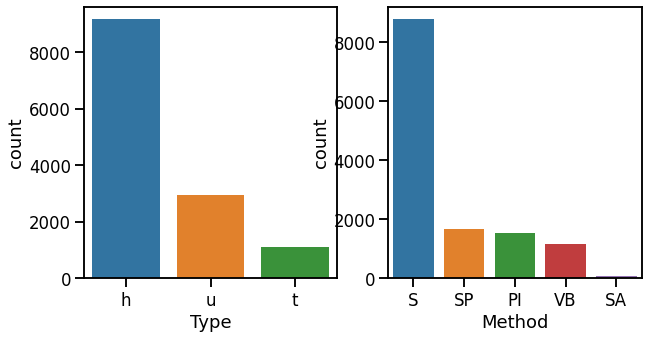

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (10,5))
sns.countplot(data = reduced_melb_df, x = 'Type', ax = axes[0])
sns.countplot(data = reduced_melb_df, x = 'Method', ax = axes[1])
plt.show()

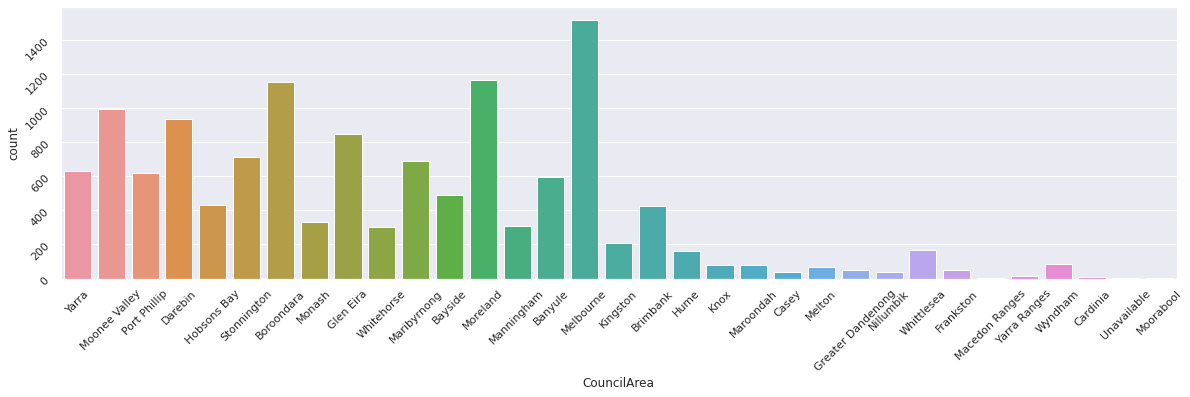

In [11]:
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(data = reduced_melb_df, x = 'CouncilArea')
plt.tick_params(rotation = 45)

In [12]:
sns.set(rc={'figure.figsize':(10,5)})

In [13]:
reduced_melb_df.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Distance', 'Postcode', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Airbnb_Qtty',
       'Airbnb_Median', 'Airbnb_Mean', 'Airbnb_DevStd'],
      dtype='object')

In [14]:
# Elección de las variables numéricas con las que trabajar
numerical_cols = ['Rooms','Price','Distance','Landsize','Airbnb_Mean','Airbnb_DevStd']
reduced_melb_df = reduced_melb_df.drop(columns = ['Postcode', 'Airbnb_Qtty', 'Airbnb_Median'])
reduced_melb_df.shape

(13199, 11)

In [15]:
reduced_melb_df.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Distance', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Airbnb_Mean',
       'Airbnb_DevStd'],
      dtype='object')

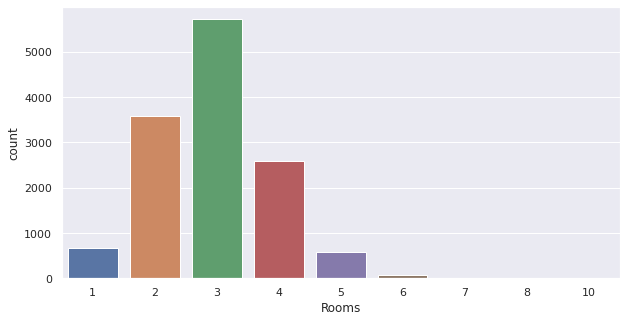

In [16]:
sns.countplot(data = reduced_melb_df, x = 'Rooms')

In [17]:
price_min = reduced_melb_df['Price'].min()
price_max = reduced_melb_df['Price'].max()
print(f'{price_min} <= Price <= {price_max}')

85000.0 <= Price <= 9000000.0


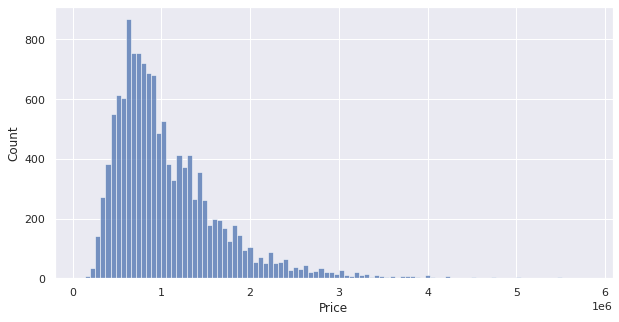

In [18]:
# Eliminación de valores atipicos en Price
clean_df_1 =  reduced_melb_df[reduced_melb_df['Price'] < 6e6].copy()
sns.histplot(data = clean_df_1['Price'])

In [19]:
clean_df_1.shape

(13193, 11)

In [20]:
distance_min = clean_df_1['Distance'].min()
distance_max = clean_df_1['Distance'].max()
print(f'{distance_min} <= Distance <= {distance_max}')

0.0 <= Distance <= 47.4


In [21]:
landsize_min = clean_df_1['Landsize'].min()
landsize_max = clean_df_1['Landsize'].max()
print(f'{landsize_min} <= Landsize <= {landsize_max}')

0.0 <= Landsize <= 4977.0


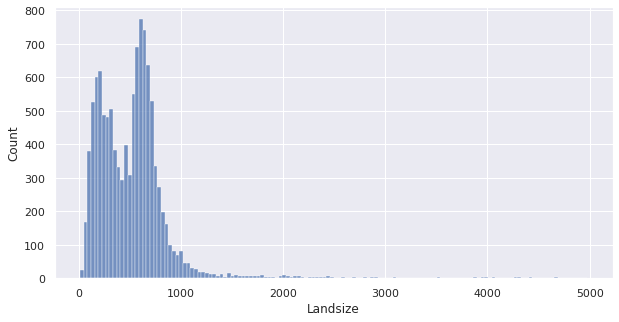

In [22]:
# Eliminación de valores atípicos de Landsize
clean_df_2 =  clean_df_1[(clean_df_1['Landsize'] > 10.0) & (clean_df_1['Landsize'] < 5000.0)].copy()
sns.histplot(data = clean_df_2['Landsize'])

In [23]:
Airbnb_Mean_min = clean_df_2['Airbnb_Mean'].min()
Airbnb_Mean_max = clean_df_2['Airbnb_Mean'].max()
print(f'{Airbnb_Mean_min} <= Airbnb_Mean <= {Airbnb_Mean_max}')

49.0 <= Airbnb_Mean <= 759.0833333333334


In [24]:
Airbnb_DevStd_min = clean_df_2['Airbnb_DevStd'].min()
Airbnb_DevStd_max = clean_df_2['Airbnb_DevStd'].max()
print(f'{Airbnb_DevStd_min} <= Airbnb_DevStd <= {Airbnb_DevStd_max}')

21.471253011465187 <= Airbnb_DevStd <= 2281.240828956244


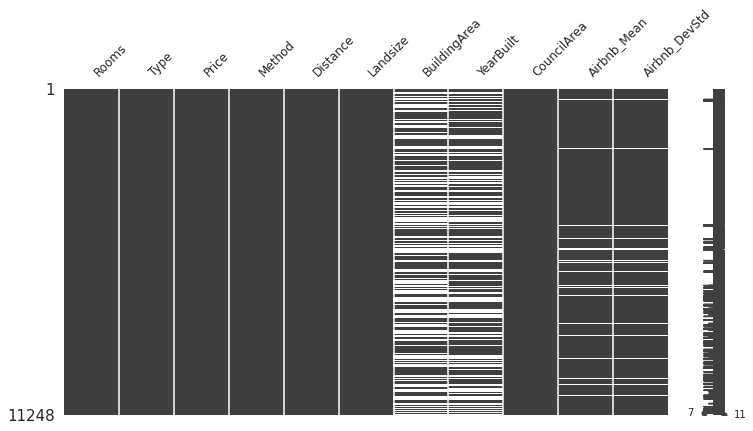

In [25]:
import missingno as msno
msno.matrix(clean_df_2,figsize=(12, 6), fontsize=12)

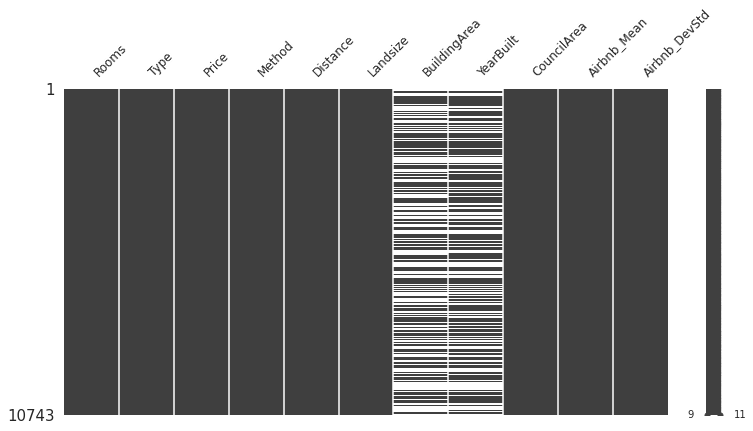

In [26]:
clean_df_2.dropna(subset = ['Airbnb_Mean','Airbnb_DevStd'], how = 'any', inplace = True)
msno.matrix(clean_df_2,figsize=(12, 6), fontsize=12)

In [27]:
# Dimensión final del df
clean_df_2.shape

(10743, 11)

In [28]:
clean_df_2.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Distance', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Airbnb_Mean',
       'Airbnb_DevStd'],
      dtype='object')

In [29]:
# Preprocesamiento de los datos antes de la conversión
categorical_cols = ['Type','Method','CouncilArea']
melb_dict = list(clean_df_2[categorical_cols].T.to_dict().values())
melb_dict[:1]

[{'CouncilArea': 'Yarra', 'Method': 'S', 'Type': 'h'}]

In [30]:
# Conversión a OneHoT Encoding
from sklearn.feature_extraction import DictVectorizer
vectorizador = DictVectorizer(sparse = False) #-------------> Transforma el diccionario en el diccionario en un vector. 
                                                            # sparse = False hace que la codificación sea tipo OneHot
melb_vect_matrix = vectorizador.fit_transform(melb_dict)

print(f'La dimensión de la matriz es {melb_vect_matrix.shape}')
print(melb_vect_matrix)
print(type(melb_vect_matrix))

La dimensión de la matriz es (10743, 39)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
<class 'numpy.ndarray'>


In [31]:
# Incorporación de variables numéricas (Sin BuldingArea ni YearBuilt)
numerical_cols = ['Rooms','Price','Distance','Landsize','Airbnb_Mean','Airbnb_DevStd']
numeric_df = clean_df_2[numerical_cols]

In [32]:
new_matrix = np.hstack([melb_vect_matrix,numeric_df.to_numpy()])
print(f'La dimensión de la nueva matriz es {new_matrix.shape}')
print(new_matrix)
print(type(new_matrix))

La dimensión de la nueva matriz es (10743, 45)
[[  0.           0.           0.         ... 202.         130.62403101
  115.26748677]
 [  0.           0.           0.         ... 156.         130.62403101
  115.26748677]
 [  0.           0.           0.         ... 134.         130.62403101
  115.26748677]
 ...
 [  0.           0.           0.         ... 436.         191.09459459
  128.55691868]
 [  0.           0.           0.         ... 866.         191.09459459
  128.55691868]
 [  0.           0.           0.         ... 362.         135.6097561
   89.65279475]]
<class 'numpy.ndarray'>


In [33]:
memoria = np.product(new_matrix.shape) * 4 / 1024 / 1024
print(f'La matriz ocupa un espacio de memoria de aproximadamente {memoria:.02f} MB')

La matriz ocupa un espacio de memoria de aproximadamente 1.84 MB


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [34]:
# Agregado de columnas 'YearBuilt' y 'BuildingArea' a la matriz del ejercicio anterior
two_cols = clean_df_2[['BuildingArea','YearBuilt']]
two_cols_matrix = two_cols.to_numpy()
new_complete_matrix = np.hstack([new_matrix,two_cols_matrix])
new_complete_matrix.shape

(10743, 47)

In [35]:
two_cols_matrix

array([[  nan,   nan],
       [  79., 1900.],
       [ 150., 1900.],
       ...,
       [  nan, 1997.],
       [ 157., 1920.],
       [ 112., 1920.]])

In [36]:
clean_df_2.isna().sum()

Rooms               0
Type                0
Price               0
Method              0
Distance            0
Landsize            0
BuildingArea     5115
YearBuilt        4330
CouncilArea         0
Airbnb_Mean         0
Airbnb_DevStd       0
dtype: int64

In [37]:
np.isnan(new_complete_matrix.data).sum() # Son los correspondientes a 'YearBuilt' y 'BuildingArea'

9445

In [38]:
# Escaleo de datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Columnas aisladas
scaled_cols = scaler.fit_transform(two_cols_matrix)
scaled_cols

array([[        nan,         nan],
       [-0.88470636, -1.63486797],
       [-0.04916407, -1.63486797],
       ...,
       [        nan,  0.94990078],
       [ 0.03321334, -1.10192596],
       [-0.49635572, -1.10192596]])

In [39]:
# Matriz completa
scaled_matrix = scaler.fit_transform(new_complete_matrix)
scaled_matrix

array([[-0.21341847, -0.20270484, -0.31415114, ..., -0.19185418,
                nan,         nan],
       [-0.21341847, -0.20270484, -0.31415114, ..., -0.19185418,
        -0.88470636, -1.63486797],
       [-0.21341847, -0.20270484, -0.31415114, ..., -0.19185418,
        -0.04916407, -1.63486797],
       ...,
       [-0.21341847, -0.20270484, -0.31415114, ..., -0.14693871,
                nan,  0.94990078],
       [-0.21341847, -0.20270484, -0.31415114, ..., -0.14693871,
         0.03321334, -1.10192596],
       [-0.21341847, -0.20270484, -0.31415114, ..., -0.27842641,
        -0.49635572, -1.10192596]])

In [40]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

KNN_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor(n_neighbors=2),max_iter=10)

In [41]:
# Imputación y escalado con todos los features
new_imputed_matrix = KNN_imputer.fit_transform(scaled_matrix)
# Imputación y escalado con solo dos features
two_cols_imputed = KNN_imputer.fit_transform(scaled_cols)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [42]:
# Verificación de ausencia de valores nulos
np.isnan(new_imputed_matrix[:,46]).sum()
np.isnan(new_imputed_matrix[:,45]).sum()
np.isnan(two_cols_imputed[:,1]).sum()
np.isnan(two_cols_imputed[:,0]).sum()

0

In [43]:
# Imputación con todos los features (sin escalado)
new_imputed_matrix_SE = KNN_imputer.fit_transform(new_complete_matrix)
# Imputación con solo dos features (sin escalado)
two_cols_imputed_SE = KNN_imputer.fit_transform(two_cols_matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


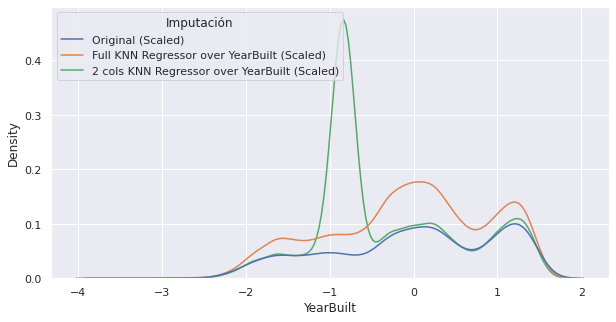

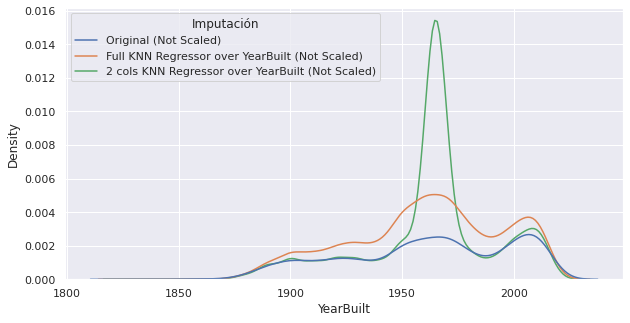

In [44]:
imputed_df_YB = pd.DataFrame(two_cols_imputed[:,1],columns = ['YearBuilt'])
imputed_df_YB['Imputación'] = '2 cols KNN Regressor over YearBuilt (Scaled)'
not_imputed_df_YB = pd.DataFrame(scaler.fit_transform(clean_df_2.YearBuilt.dropna().to_numpy().reshape(-1,1)),columns = ['YearBuilt']) # Hay que escalar los datos 
not_imputed_df_YB['Imputación'] = 'Original (Scaled)'
columna_YB = new_imputed_matrix.shape[1]-1
full_imputed_df_YB = pd.DataFrame(new_imputed_matrix[:,columna_YB],columns = ['YearBuilt'])
full_imputed_df_YB['Imputación'] = 'Full KNN Regressor over YearBuilt (Scaled)'
data_YB = pd.concat([not_imputed_df_YB,full_imputed_df_YB,imputed_df_YB],ignore_index = True)

plt.figure(figsize = (10,5))
g = sns.kdeplot(data=data_YB, x='YearBuilt', hue='Imputación')

imputed_df_YB_se = pd.DataFrame(two_cols_imputed_SE[:,1],columns = ['YearBuilt'])
imputed_df_YB_se['Imputación'] = '2 cols KNN Regressor over YearBuilt (Not Scaled)'
not_imputed_df_YB_se = clean_df_2.YearBuilt.dropna().to_frame()
not_imputed_df_YB_se['Imputación'] = 'Original (Not Scaled)'
columna_YB_SE = new_imputed_matrix_SE.shape[1]-1
full_imputed_df_YB_se = pd.DataFrame(new_imputed_matrix_SE[:,columna_YB_SE],columns = ['YearBuilt'])
full_imputed_df_YB_se['Imputación'] = 'Full KNN Regressor over YearBuilt (Not Scaled)'
data_YB_se = pd.concat([not_imputed_df_YB_se, full_imputed_df_YB_se, imputed_df_YB_se],ignore_index = True)

plt.figure(figsize = (10,5))
g = sns.kdeplot(data=data_YB_se, x='YearBuilt', hue='Imputación')

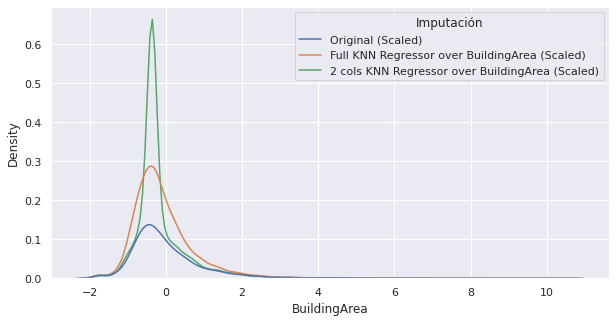

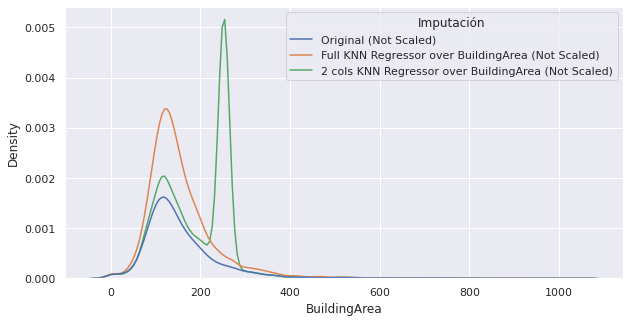

In [45]:
imputed_df_BA = pd.DataFrame(two_cols_imputed[:,0],columns = ['BuildingArea'])
imputed_df_BA['Imputación'] = '2 cols KNN Regressor over BuildingArea (Scaled)'
not_imputed_df_BA = pd.DataFrame(scaler.fit_transform(clean_df_2.BuildingArea.dropna().to_numpy().reshape(-1,1)),columns = ['BuildingArea']) # Hay que escalar los datos 
not_imputed_df_BA['Imputación'] = 'Original (Scaled)'
columna_BA = new_imputed_matrix.shape[1]-2
full_imputed_df_BA = pd.DataFrame(new_imputed_matrix[:,columna_BA],columns = ['BuildingArea'])
full_imputed_df_BA['Imputación'] = 'Full KNN Regressor over BuildingArea (Scaled)'
data_BA = pd.concat([not_imputed_df_BA,full_imputed_df_BA,imputed_df_BA],ignore_index = True)
plt.figure(figsize = (10,5))
g = sns.kdeplot(data=data_BA, x='BuildingArea', hue='Imputación')

imputed_df_BA_se = pd.DataFrame(two_cols_imputed_SE[:,0],columns = ['BuildingArea'])
imputed_df_BA_se['Imputación'] = '2 cols KNN Regressor over BuildingArea (Not Scaled)'
not_imputed_df_BA_se = clean_df_2.BuildingArea.dropna().to_frame()
not_imputed_df_BA_se['Imputación'] = 'Original (Not Scaled)'
columna_BA_SE = new_imputed_matrix_SE.shape[1]-2
full_imputed_df_BA_se = pd.DataFrame(new_imputed_matrix_SE[:,columna_BA_SE],columns = ['BuildingArea'])
full_imputed_df_BA_se['Imputación'] = 'Full KNN Regressor over BuildingArea (Not Scaled)'
data_BA_se = pd.concat([not_imputed_df_BA_se, full_imputed_df_BA_se, imputed_df_BA_se],ignore_index = True)

plt.figure(figsize = (10,5))
g = sns.kdeplot(data=data_BA_se, x='BuildingArea', hue='Imputación')

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [46]:
# Aplicación de PCA
from sklearn.decomposition import PCA
n = min(20,scaled_matrix.shape[0])
pca_strd = PCA(n_components=n)
proyected_matrix_strd = pca_strd.fit_transform(new_imputed_matrix)
proyected_matrix_strd.shape

(10743, 20)

In [50]:
pca_strd.explained_variance_ratio_

array([0.06128968, 0.0516183 , 0.04435136, 0.03954142, 0.03475355,
       0.02984667, 0.02584607, 0.02450144, 0.02375283, 0.02366554,
       0.02329138, 0.02311316, 0.02277174, 0.02270792, 0.0223366 ,
       0.02222208, 0.02210639, 0.02201165, 0.02198011, 0.02192789])

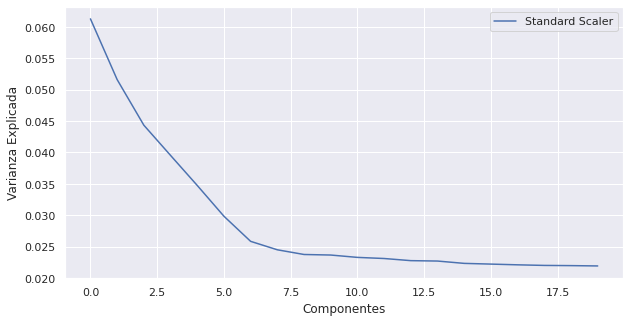

In [48]:
# Gr;afico de Varianza Explicada vs n_components
sns.lineplot(x=range(pca_strd.n_components), y=pca_strd.explained_variance_ratio_, label = 'Standard Scaler')
plt.xlabel('Componentes')
plt.ylabel('Varianza Explicada')
plt.show()

In [49]:
# Incorporación de columnas de la matriz PCA a la matriz del conjunto total de datos
sub_matrix_PCA = proyected_matrix_strd[:,:5]
final_matrix = np.hstack([new_imputed_matrix,sub_matrix_PCA])
final_matrix.shape

(10743, 52)

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [51]:
# Step 1: encode categorical columns
from sklearn.preprocessing import OneHotEncoder

new_columns = []
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(clean_df_2[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))

# Step 2: Append the numerical columns
new_columns.extend(numerical_cols)
new_columns.extend(['BuildingArea','YearBuilt'])
new_columns.extend(['pca1', 'pca2', 'pca3', 'pca4', 'pca5'])
print("Matrix has shape {}, with columns: {}".format(final_matrix.shape, new_columns))
len(new_columns)

Matrix has shape (10743, 52), with columns: ['Type=h', 'Type=t', 'Type=u', 'Method=PI', 'Method=S', 'Method=SA', 'Method=SP', 'Method=VB', 'CouncilArea=Banyule', 'CouncilArea=Bayside', 'CouncilArea=Boroondara', 'CouncilArea=Brimbank', 'CouncilArea=Cardinia', 'CouncilArea=Casey', 'CouncilArea=Darebin', 'CouncilArea=Frankston', 'CouncilArea=Glen Eira', 'CouncilArea=Greater Dandenong', 'CouncilArea=Hobsons Bay', 'CouncilArea=Hume', 'CouncilArea=Kingston', 'CouncilArea=Knox', 'CouncilArea=Manningham', 'CouncilArea=Maribyrnong', 'CouncilArea=Maroondah', 'CouncilArea=Melbourne', 'CouncilArea=Melton', 'CouncilArea=Monash', 'CouncilArea=Moonee Valley', 'CouncilArea=Moreland', 'CouncilArea=Nillumbik', 'CouncilArea=Port Phillip', 'CouncilArea=Stonnington', 'CouncilArea=Unavailable', 'CouncilArea=Whitehorse', 'CouncilArea=Whittlesea', 'CouncilArea=Wyndham', 'CouncilArea=Yarra', 'CouncilArea=Yarra Ranges', 'Rooms', 'Price', 'Distance', 'Landsize', 'Airbnb_Mean', 'Airbnb_DevStd', 'BuildingArea', 'Y

52

In [52]:
final_df = pd.DataFrame(data = final_matrix, columns = new_columns)
final_df

,Type=h,Type=t,Type=u,Method=PI,Method=S,Method=SA,Method=SP,Method=VB,CouncilArea=Banyule,CouncilArea=Bayside,...,Landsize,Airbnb_Mean,Airbnb_DevStd,BuildingArea,YearBuilt,pca1,pca2,pca3,pca4,pca5
0,-0.213418,-0.202705,-0.314151,-0.191491,-0.021579,-0.049255,-0.28917,-0.058788,-0.261376,-0.069742,...,-0.762471,0.008543,-0.191854,-0.749372,-1.501632,0.330927,1.748816,-2.951882,1.348340,0.213541
1,-0.213418,-0.202705,-0.314151,-0.191491,-0.021579,-0.049255,-0.28917,-0.058788,-0.261376,-0.069742,...,-0.868797,0.008543,-0.191854,-0.884706,-1.634868,0.007463,1.689535,-3.006269,1.476094,0.464819
2,-0.213418,-0.202705,-0.314151,-0.191491,-0.021579,-0.049255,-0.28917,-0.058788,-0.261376,-0.069742,...,-0.919648,0.008543,-0.191854,-0.049164,-1.634868,0.772837,1.498796,-2.371839,-1.076878,1.926032
3,-0.213418,-0.202705,-0.314151,-0.191491,-0.021579,-0.049255,-0.28917,-0.058788,-0.261376,-0.069742,...,-1.012105,0.008543,-0.191854,-0.514008,-0.129307,0.226233,1.311940,-1.852919,-1.314222,1.112509
4,-0.213418,-0.202705,-0.314151,-0.191491,-0.021579,-0.049255,-0.28917,-0.058788,-0.261376,-0.069742,...,-0.952008,0.008543,-0.191854,-0.143310,1.402901,0.935222,1.175795,-1.303106,-1.764742,0.114421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10738,-0.213418,-0.202705,-0.314151,-0.191491,-0.021579,-0.049255,-0.28917,-0.058788,-0.261376,-0.069742,...,0.277669,-0.090753,-0.240844,0.368607,0.523547,0.925384,-1.282365,0.619093,0.664948,-0.199139
10739,-0.213418,-0.202705,-0.314151,-0.191491,-0.021579,-0.049255,-0.28917,-0.058788,-0.261376,-0.069742,...,-0.459675,0.918648,-0.146939,-0.249223,0.896607,-0.008098,0.221604,0.376638,-1.427506,1.957767
10740,-0.213418,-0.202705,-0.314151,-0.191491,-0.021579,-0.049255,-0.28917,-0.058788,-0.261376,-0.069742,...,-0.221598,0.918648,-0.146939,-1.002388,0.949901,0.075438,0.277128,-0.053583,0.867737,0.087196
10741,-0.213418,-0.202705,-0.314151,-0.191491,-0.021579,-0.049255,-0.28917,-0.058788,-0.261376,-0.069742,...,0.772314,0.918648,-0.146939,0.033213,-1.101926,2.470455,0.771228,0.171056,-2.017777,0.488272


## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
